# Import Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./ACME-HappinessSurvey2020.csv")

# Exploratory Data Analysis

In [3]:
df.shape

(126, 7)

In [4]:
df.dtypes

Y     int64
X1    int64
X2    int64
X3    int64
X4    int64
X5    int64
X6    int64
dtype: object

In [5]:
df.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


In [7]:
df.describe()

,Y,X1,X2,X3,X4,X5,X6
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


We can see that there is no missing values as all columns have 126 data.</br>
<br>As well, the data is all numeric so it is not required data wrangling and preprocessing.

### Analyze the data by each column.

#### X1 - my order was delivered on time

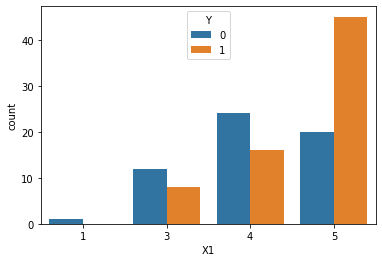

In [8]:
sns.countplot(data=df, x="X1", hue="Y")

In [9]:
pd.pivot_table(df, index="X1", values="Y")

,Y
X1,
1,0.000000
3,0.400000
4,0.400000
5,0.692308


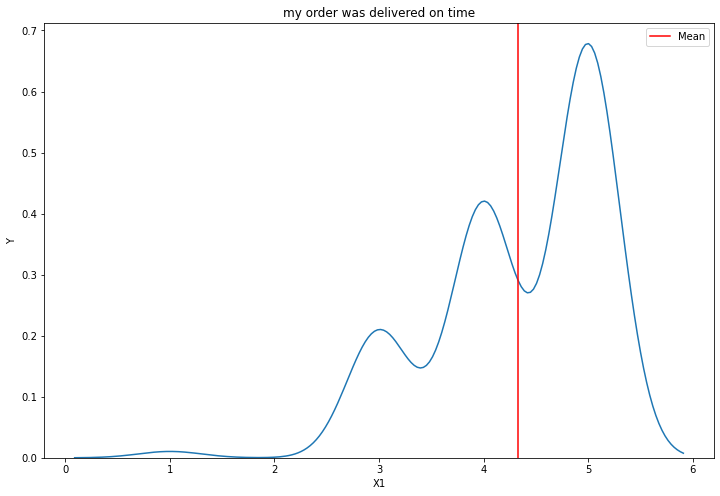

In [10]:
# Create fig, ax objects
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the kde
sns.kdeplot(df["X1"], bw_adjust=1)

ax.set(title='my order was delivered on time', xlabel='X1', ylabel='Y')

# Annotate the mean
ax.axvline(x=df["X1"].mean(), color='red', label='Mean')
ax.legend()

plt.show()

As the dataset is imbalanced, use Bootstrap sampling

In [11]:
# Create an empty numpy array of size 10k
means = np.empty(10000)

# Initialize the bootstrap
for i in range(10000):
    # Take random draws from the underlying data
    bs_sample = np.random.choice(df['X1'], size=len(df['X1']))
    # Append its mean to means
    means[i] = bs_sample.mean()

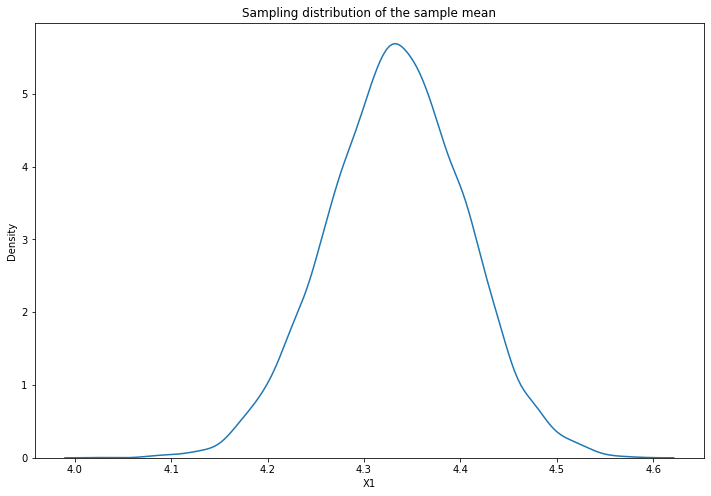

In [12]:
# Create fig, ax objects
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the kde
sns.kdeplot(means, ax=ax, bw_adjust=1)

# Labeling
ax.set(title='Sampling distribution of the sample mean', xlabel='X1')

plt.show()

In [13]:
# 95% Confidence intervals
np.percentile(means, [0.25, 97.5]).round(2)

array([4.13, 4.48])

When the order was delivered on time, the customers get happier.

#### X2 - contents of my order was as I expected

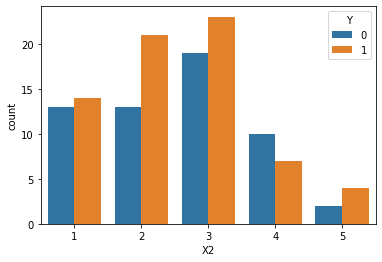

In [14]:
sns.countplot(data=df, x="X2", hue="Y")

In [15]:
pd.pivot_table(df, index="X2", values="Y")

,Y
X2,
1,0.518519
2,0.617647
3,0.547619
4,0.411765
5,0.666667


The contents of my order seem rarely affecting to the customer's happiness.

#### X3 - I ordered everything I wanted to order

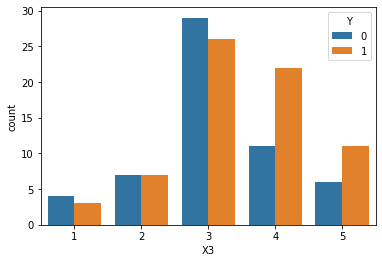

In [16]:
sns.countplot(data=df, x="X3", hue="Y")

In [17]:
pd.pivot_table(df, index="X3", values="Y")

,Y
X3,
1,0.428571
2,0.500000
3,0.472727
4,0.666667
5,0.647059


It seems less affecting to the customer's happiness whether I ordered everything I wanted to order or not.

#### X4 - I paid a good price for my order

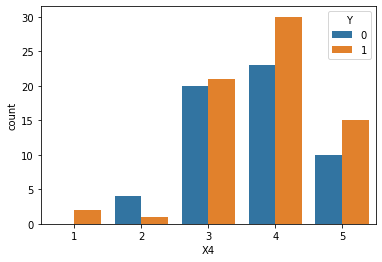

In [18]:
sns.countplot(data=df, x="X4", hue="Y")

In [19]:
pd.pivot_table(df, index="X4", values="Y")

,Y
X4,
1,1.000000
2,0.200000
3,0.512195
4,0.566038
5,0.600000


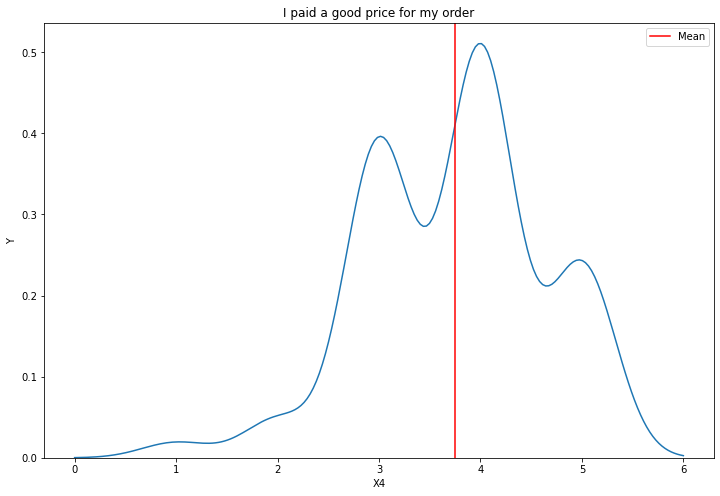

In [20]:
# Create fig, ax objects
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the kde
sns.kdeplot(df["X4"], bw_adjust=1)

ax.set(title='I paid a good price for my order', xlabel='X4', ylabel='Y')

# Annotate the mean
ax.axvline(x=df["X4"].mean(), color='red', label='Mean')
ax.legend()

plt.show()

As the dataset is imbalanced, use Bootstrap sampling

In [21]:
# Create an empty numpy array of size 10k
means = np.empty(10000)

# Initialize the bootstrap
for i in range(10000):
    # Take random draws from the underlying data
    bs_sample = np.random.choice(df['X4'], size=len(df['X4']))
    # Append its mean to means
    means[i] = bs_sample.mean()

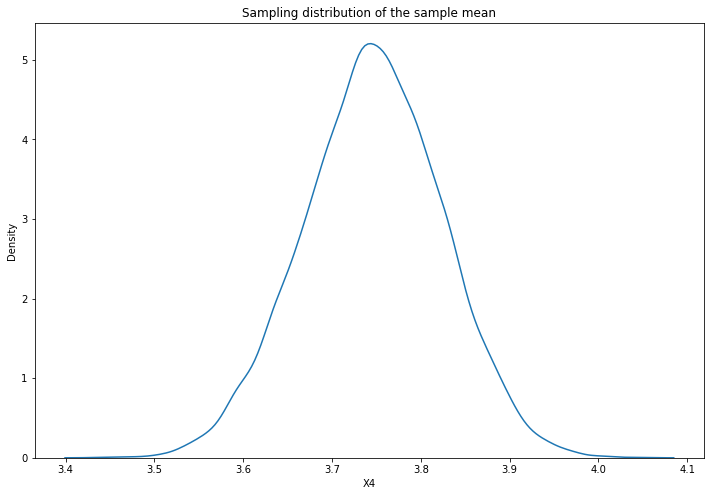

In [22]:
# Create fig, ax objects
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the kde
sns.kdeplot(means, ax=ax, bw_adjust=1)

# Labeling
ax.set(title='Sampling distribution of the sample mean', xlabel='X4')

plt.show()

In [23]:
# 95% Confidence intervals
np.percentile(means, [0.25, 97.5]).round(2)

array([3.53, 3.9 ])

It seems the customers are happy when the price is reasonable.

#### X5 - I am satisfied with my courier

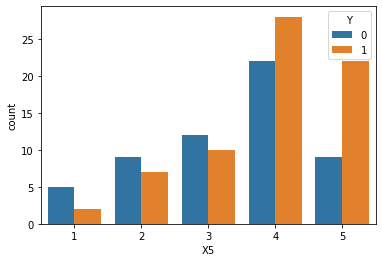

In [24]:
sns.countplot(data=df, x="X5", hue="Y")

In [25]:
pd.pivot_table(df, index="X5", values="Y")

,Y
X5,
1,0.285714
2,0.437500
3,0.454545
4,0.560000
5,0.709677


When the order is delivered in a good condition, the customer is happy.

#### X6 - The app makes ordering easy for me

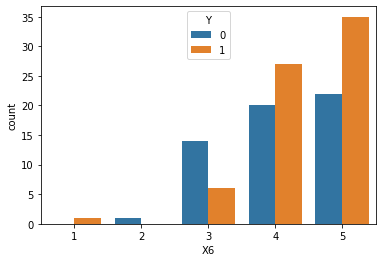

In [26]:
sns.countplot(data=df, x="X6", hue="Y")

In [27]:
pd.pivot_table(df, index="X6", values="Y")

,Y
X6,
1,1.000000
2,0.000000
3,0.300000
4,0.574468
5,0.614035


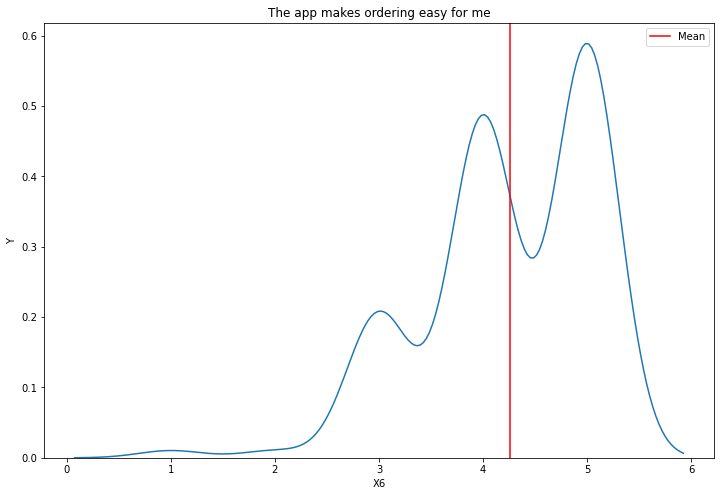

In [28]:
# Create fig, ax objects
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the kde
sns.kdeplot(df["X6"], bw_adjust=1)

ax.set(title='The app makes ordering easy for me', xlabel='X6', ylabel='Y')

# Annotate the mean
ax.axvline(x=df["X6"].mean(), color='red', label='Mean')
ax.legend()

plt.show()

As the dataset is imbalanced, use Bootstrap sampling

In [29]:
# Create an empty numpy array of size 10k
means = np.empty(10000)

# Initialize the bootstrap
for i in range(10000):
    # Take random draws from the underlying data
    bs_sample = np.random.choice(df['X6'], size=len(df['X6']))
    # Append its mean to means
    means[i] = bs_sample.mean()

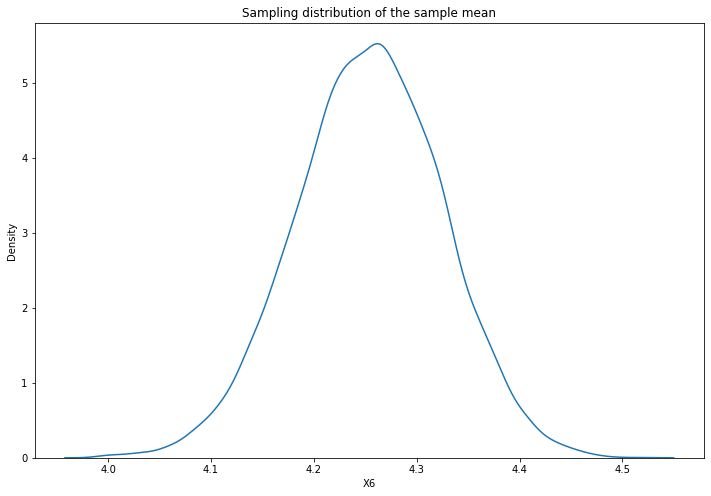

In [30]:
# Create fig, ax objects
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the kde
sns.kdeplot(means, ax=ax, bw_adjust=1)

# Labeling
ax.set(title='Sampling distribution of the sample mean', xlabel='X6')

plt.show()

In [31]:
# 95% Confidence intervals
np.percentile(means, [0.25, 97.5]).round(2)

array([4.04, 4.39])

If the app is easy to use for customers, they are much happy.

### Feature selection

As we saw that the columns X1, X4, X5, and X6 have a positive correlation with Y, I will select them as a feature.

In [32]:
feature = ["X1", "X4", "X5", "X6"]
X = df[feature]
y = df["Y"]

### Split the data into train and test

Split train and test to 80/20

In [33]:
from sklearn.model_selection import train_test_split

# Split the dataframe into train and test with 20% for test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

In [34]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((100, 4), (100,), (26, 4), (26,))

In [35]:
df_train = pd.DataFrame(X_train)
df_train['Y'] = y_train

In [36]:
df_train.head()

,X1,X4,X5,X6,Y
3,5,3,3,5,0
36,5,3,4,5,1
55,4,4,3,4,1
64,4,4,4,4,1
82,4,4,4,4,1


In [37]:
df_train.shape

(100, 5)

### Bootstrap Sampling

In [38]:
# scikit-learn bootstrap
from sklearn.utils import resample

In [39]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

In [40]:
# Perform single bootstrap for each dataset
df_boot = df_train.sample(n=500, replace=True, random_state=777)

In [41]:
df_boot.head()

,X1,X4,X5,X6,Y
66,3,5,4,3,0
65,4,4,4,4,1
33,3,4,4,5,1
93,5,4,4,5,1
4,5,3,3,5,0


In [42]:
df_boot.shape

(500, 5)

In [43]:
X_train_boot = df_boot.iloc[:,:-1].to_numpy()
y_train_boot = df_boot.iloc[:,-1].to_numpy()

In [44]:
X_train_boot, y_train_boot

(array([[3, 5, 4, 3],
        [4, 4, 4, 4],
        [3, 4, 4, 5],
        ...,
        [5, 3, 3, 5],
        [4, 4, 3, 4],
        [5, 2, 2, 4]]),
 array([0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
        0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
        1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
        1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
        1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
        1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
        1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
        1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
        1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1

# Modeling

In [45]:
from sklearn.model_selection import GridSearchCV

## 1. Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
model_LR = LogisticRegression()
model_LR.fit(X_train_boot, y_train_boot)

LogisticRegression()

In [48]:
y_pred_LR = model_LR.predict(X_test)

#### Evaluation

In [49]:
model_score_LR = model_LR.score(X_train_boot, y_train_boot)

In [50]:
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           0       0.75      0.23      0.35        13
           1       0.55      0.92      0.69        13

    accuracy                           0.58        26
   macro avg       0.65      0.58      0.52        26
weighted avg       0.65      0.58      0.52        26



## 2. Decision Tree

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
model_DT = DecisionTreeClassifier(max_depth=8, random_state=0)
model_DT.fit(X_train_boot, y_train_boot)

DecisionTreeClassifier(max_depth=8, random_state=0)

In [53]:
y_pred_DT = model_DT.predict(X_test)

#### Evaluation

In [54]:
model_score_DT = model_DT.score(X_train_boot, y_train_boot)

In [55]:
print(classification_report(y_test, y_pred_DT))

              precision    recall  f1-score   support

           0       0.42      0.38      0.40        13
           1       0.43      0.46      0.44        13

    accuracy                           0.42        26
   macro avg       0.42      0.42      0.42        26
weighted avg       0.42      0.42      0.42        26



## 3. Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
model_RF = RandomForestClassifier(n_estimators=50, max_depth=9, random_state=36, n_jobs=-1)
model_RF.fit(X_train_boot, y_train_boot)

RandomForestClassifier(max_depth=9, n_estimators=50, n_jobs=-1, random_state=36)

In [58]:
y_pred_RF = model_RF.predict(X_test)

#### Evaluation

In [59]:
model_score_RF = model_RF.score(X_train_boot, y_train_boot)

In [60]:
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       0.50      0.38      0.43        13
           1       0.50      0.62      0.55        13

    accuracy                           0.50        26
   macro avg       0.50      0.50      0.49        26
weighted avg       0.50      0.50      0.49        26



## 4. K-Nearest Neighbor

In [61]:
from sklearn.neighbors import KNeighborsClassifier

In [62]:
model_KNN = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
model_KNN.fit(X_train_boot, y_train_boot)

KNeighborsClassifier()

In [63]:
y_pred_KNN = model_KNN.predict(X_test)

#### Evaluation

In [64]:
model_score_KNN = model_KNN.score(X_train_boot, y_train_boot)

In [65]:
print(classification_report(y_test, y_pred_KNN))

              precision    recall  f1-score   support

           0       0.40      0.31      0.35        13
           1       0.44      0.54      0.48        13

    accuracy                           0.42        26
   macro avg       0.42      0.42      0.42        26
weighted avg       0.42      0.42      0.42        26



## 5. Support Vector Machines (SVM)

In [66]:
from sklearn.svm import SVC

In [67]:
model_SVC = SVC(kernel='rbf', gamma='auto')
model_SVC.fit(X_train_boot, y_train_boot)

SVC(gamma='auto')

In [68]:
y_pred_SVC = model_SVC.predict(X_test)

#### Evaluation

In [69]:
model_score_SVC = model_SVC.score(X_train_boot, y_train_boot)

In [70]:
print(classification_report(y_test, y_pred_SVC))

              precision    recall  f1-score   support

           0       0.43      0.23      0.30        13
           1       0.47      0.69      0.56        13

    accuracy                           0.46        26
   macro avg       0.45      0.46      0.43        26
weighted avg       0.45      0.46      0.43        26



## 6. Naive Bayes

In [71]:
from sklearn.naive_bayes import GaussianNB

In [72]:
model_GNB = GaussianNB()
model_GNB.fit(X_train_boot, y_train_boot)

GaussianNB()

In [73]:
y_pred_GNB = model_GNB.predict(X_test)

#### Evaluation

In [74]:
model_score_GNB = model_GNB.score(X_train_boot, y_train_boot)

In [75]:
print(classification_report(y_test, y_pred_GNB))

              precision    recall  f1-score   support

           0       1.00      0.15      0.27        13
           1       0.54      1.00      0.70        13

    accuracy                           0.58        26
   macro avg       0.77      0.58      0.48        26
weighted avg       0.77      0.58      0.48        26



In [76]:
confusion_matrix(y_test, y_pred_GNB)

array([[ 2, 11],
       [ 0, 13]])

# Comparison of Model Performance

In [77]:
print("Logistic Regression:\t\t%.5f" %model_score_LR)
print("Decision Tree:\t\t\t%.5f" %model_score_DT)
print("Random Forest:\t\t\t%.5f" %model_score_RF)
print("K-Nearest Neighbor:\t\t%.5f" %model_score_KNN)
print("SVM:\t\t\t\t%.5f" %model_score_SVC)
print("Naive Bayes:\t\t\t%.5f" %model_score_GNB)

Logistic Regression:		0.59800
Decision Tree:			0.82200
Random Forest:			0.84200
K-Nearest Neighbor:		0.83600
SVM:				0.78200
Naive Bayes:			0.60800


# Model Evaluation

In [78]:
print("R-squared of Logistic Regression:\t   %.5f" %r2_score(y_test, y_pred_LR))
print("R-squared of Decision Tree:\t\t   %.5f" %r2_score(y_test, y_pred_DT))
print("R-squared of Random Forest:\t\t   %.5f" %r2_score(y_test, y_pred_RF))
print("R-squared of K-Nearest Neighbor:\t   %.5f" %r2_score(y_test, y_pred_KNN))
print("R-squared of SVM:\t\t\t   %.5f" %r2_score(y_test, y_pred_SVC))
print("R-squared of Naive Bayes:\t\t   %.5f" %r2_score(y_test, y_pred_GNB))

R-squared of Logistic Regression:	   -0.69231
R-squared of Decision Tree:		   -1.30769
R-squared of Random Forest:		   -1.00000
R-squared of K-Nearest Neighbor:	   -1.30769
R-squared of SVM:			   -1.15385
R-squared of Naive Bayes:		   -0.69231


# Conclusion

Random Forest model shows the best performance with 81% of accuracy.

# Additional analysis with different feature

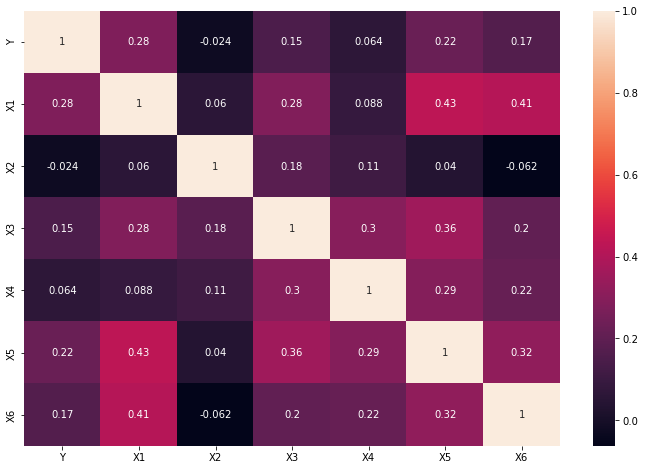

In [79]:
# Create correlation matrix
corr = df.corr()

plt.figure(figsize = (12, 8))
sns.heatmap(corr, annot = True)
plt.show()

As we can see from the above heatmap, X2 and X4 have negative or weak correlation with Y so we can exclude them for a feature.

### Feature selection

As we saw that the columns X1, X4, X5, and X6 have a positive correlation with Y, I will select them as a feature.

In [80]:
feature = ["X1", "X3", "X5", "X6"]
X = df[feature]
y = df["Y"]

### Split the data into train and test

Split train and test to 80/20

In [81]:
from sklearn.model_selection import train_test_split

# Split the dataframe into train and test with 20% for test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

In [82]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((100, 4), (100,), (26, 4), (26,))

In [83]:
df_train = pd.DataFrame(X_train)
df_train['Y'] = y_train

In [84]:
df_train.head()

,X1,X3,X5,X6,Y
3,5,3,3,5,0
36,5,4,4,5,1
55,4,2,3,4,1
64,4,3,4,4,1
82,4,4,4,4,1


In [85]:
df_train.shape

(100, 5)

### Bootstrap Sampling

In [86]:
# scikit-learn bootstrap
from sklearn.utils import resample

In [87]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

In [88]:
# Perform single bootstrap for each dataset
df_boot = df_train.sample(n=500, replace=True, random_state=777)

In [89]:
df_boot.head()

,X1,X3,X5,X6,Y
66,3,3,4,3,0
65,4,3,4,4,1
33,3,4,4,5,1
93,5,4,4,5,1
4,5,3,3,5,0


In [90]:
df_boot.shape

(500, 5)

In [91]:
X_train_boot = df_boot.iloc[:,:-1].to_numpy()
y_train_boot = df_boot.iloc[:,-1].to_numpy()

In [92]:
X_train_boot, y_train_boot

(array([[3, 3, 4, 3],
        [4, 3, 4, 4],
        [3, 4, 4, 5],
        ...,
        [5, 3, 3, 5],
        [4, 3, 3, 4],
        [5, 4, 2, 4]]),
 array([0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
        0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
        1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
        1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
        1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
        1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
        1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
        1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
        1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1

# Modeling

In [93]:
from sklearn.model_selection import GridSearchCV

## 1. Logistic Regression

In [94]:
from sklearn.linear_model import LogisticRegression

In [95]:
model_LR = LogisticRegression()
model_LR.fit(X_train_boot, y_train_boot)

LogisticRegression()

In [96]:
y_pred_LR = model_LR.predict(X_test)

#### Evaluation

In [97]:
model_score_LR = model_LR.score(X_train_boot, y_train_boot)

In [98]:
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           0       1.00      0.15      0.27        13
           1       0.54      1.00      0.70        13

    accuracy                           0.58        26
   macro avg       0.77      0.58      0.48        26
weighted avg       0.77      0.58      0.48        26



## 2. Decision Tree

In [99]:
from sklearn.tree import DecisionTreeClassifier

In [100]:
model_DT = DecisionTreeClassifier(max_depth=8, random_state=0)
model_DT.fit(X_train_boot, y_train_boot)

DecisionTreeClassifier(max_depth=8, random_state=0)

In [101]:
y_pred_DT = model_DT.predict(X_test)

#### Evaluation

In [102]:
model_score_DT = model_DT.score(X_train_boot, y_train_boot)

In [103]:
print(classification_report(y_test, y_pred_DT))

              precision    recall  f1-score   support

           0       0.70      0.54      0.61        13
           1       0.62      0.77      0.69        13

    accuracy                           0.65        26
   macro avg       0.66      0.65      0.65        26
weighted avg       0.66      0.65      0.65        26



## 3. Random Forest

In [104]:
from sklearn.ensemble import RandomForestClassifier

In [105]:
model_RF = RandomForestClassifier(n_estimators=50, max_depth=9, random_state=36, n_jobs=-1)
model_RF.fit(X_train_boot, y_train_boot)

RandomForestClassifier(max_depth=9, n_estimators=50, n_jobs=-1, random_state=36)

In [106]:
y_pred_RF = model_RF.predict(X_test)

#### Evaluation

In [107]:
model_score_RF = model_RF.score(X_train_boot, y_train_boot)

In [108]:
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       0.71      0.38      0.50        13
           1       0.58      0.85      0.69        13

    accuracy                           0.62        26
   macro avg       0.65      0.62      0.59        26
weighted avg       0.65      0.62      0.59        26



## 4. K-Nearest Neighbor

In [109]:
from sklearn.neighbors import KNeighborsClassifier

In [110]:
model_KNN = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
model_KNN.fit(X_train_boot, y_train_boot)

KNeighborsClassifier()

In [111]:
y_pred_KNN = model_KNN.predict(X_test)

#### Evaluation

In [112]:
model_score_KNN = model_KNN.score(X_train_boot, y_train_boot)

In [113]:
print(classification_report(y_test, y_pred_KNN))

              precision    recall  f1-score   support

           0       0.50      0.31      0.38        13
           1       0.50      0.69      0.58        13

    accuracy                           0.50        26
   macro avg       0.50      0.50      0.48        26
weighted avg       0.50      0.50      0.48        26



## 5. Support Vector Machines (SVM)

In [114]:
from sklearn.svm import SVC

In [115]:
model_SVC = SVC(kernel='rbf', gamma='auto')
model_SVC.fit(X_train_boot, y_train_boot)

SVC(gamma='auto')

In [116]:
y_pred_SVC = model_SVC.predict(X_test)

#### Evaluation

In [117]:
model_score_SVC = model_SVC.score(X_train_boot, y_train_boot)

In [118]:
print(classification_report(y_test, y_pred_SVC))

              precision    recall  f1-score   support

           0       0.57      0.31      0.40        13
           1       0.53      0.77      0.62        13

    accuracy                           0.54        26
   macro avg       0.55      0.54      0.51        26
weighted avg       0.55      0.54      0.51        26



## 6. Naive Bayes

In [119]:
from sklearn.naive_bayes import GaussianNB

In [120]:
model_GNB = GaussianNB()
model_GNB.fit(X_train_boot, y_train_boot)

GaussianNB()

In [121]:
y_pred_GNB = model_GNB.predict(X_test)

#### Evaluation

In [122]:
model_score_GNB = model_GNB.score(X_train_boot, y_train_boot)

In [123]:
print(classification_report(y_test, y_pred_GNB))

              precision    recall  f1-score   support

           0       1.00      0.15      0.27        13
           1       0.54      1.00      0.70        13

    accuracy                           0.58        26
   macro avg       0.77      0.58      0.48        26
weighted avg       0.77      0.58      0.48        26



In [124]:
confusion_matrix(y_test, y_pred_GNB)

array([[ 2, 11],
       [ 0, 13]])

## 7. Voting Classifier

In [127]:
# Combine Random Forest, Extra Trees, and LightGBM classifiers evenly ('hard' voting)
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier, VotingClassifier)
import lightgbm as lgb

# Instantiate with best parameters

rfc = RandomForestClassifier(n_estimators=1000, 
                            min_samples_split=2, 
                            max_depth=8)

etc = ExtraTreesClassifier(n_estimators=100, 
                           min_samples_split=2,  
                           max_depth=8)

lgbm = lgb.LGBMClassifier(reg_alpha=0.01, 
                          num_leaves=30, 
                          min_child_samples=5, 
                          max_depth=5, 
                          learning_rate=0.2)

# Create the Voting Classifier with hard voting

vclf = VotingClassifier(estimators=[('est1', rfc), 
                                    ('est2', etc), 
                                    ('est3', lgbm)], 
                        voting = 'hard')

#Fit and predict

vclf.fit(X_train_boot, y_train_boot)
vclf_pred = vclf.predict(X_test)

# Classification report

print(classification_report(y_test, vclf_pred))

# Confusion matrix

confusion_matrix = pd.crosstab(yt, 
                               vclf_pred, 
                               rownames=['Actual'], 
                               colnames=['Predicted'])
confusion_matrix

OSError: dlopen(/opt/anaconda3/lib/python3.8/site-packages/lightgbm/lib_lightgbm.so, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib
  Referenced from: /opt/anaconda3/lib/python3.8/site-packages/lightgbm/lib_lightgbm.so
  Reason: image not found

# Comparison of Model Performance

In [ ]:
print("Logistic Regression:\t\t%.5f" %model_score_LR)
print("Decision Tree:\t\t\t%.5f" %model_score_DT)
print("Random Forest:\t\t\t%.5f" %model_score_RF)
print("K-Nearest Neighbor:\t\t%.5f" %model_score_KNN)
print("SVM:\t\t\t\t%.5f" %model_score_SVC)
print("Naive Bayes:\t\t\t%.5f" %model_score_GNB)

# Model Evaluation

In [ ]:
print("R-squared of Logistic Regression:\t   %.5f" %r2_score(y_test, y_pred_LR))
print("R-squared of Decision Tree:\t\t   %.5f" %r2_score(y_test, y_pred_DT))
print("R-squared of Random Forest:\t\t   %.5f" %r2_score(y_test, y_pred_RF))
print("R-squared of K-Nearest Neighbor:\t   %.5f" %r2_score(y_test, y_pred_KNN))
print("R-squared of SVM:\t\t\t   %.5f" %r2_score(y_test, y_pred_SVC))
print("R-squared of Naive Bayes:\t\t   %.5f" %r2_score(y_test, y_pred_GNB))

# Conclusion

1. Best model</br>
<br>Random Forest shows the best result with 85.8%.</br>
<br></br>
<br></br>
2. Necessary/Unnecessary questions</br>
<br>The below 4 questions have strongly correlated with the customers' happiness;</br>
<br>X1 - my order was delivered on time</br>
<br>X3 - I ordered everything I wanted to order</br>
<br>X5 - I am satisfied with my courier</br>
<br>X6 - The app makes ordering easy for me</br>
<br></br>
<br>while the below 2 questions have negatively or weakly correleated;</br>
<br>X2 - contents of my order was as I expected</br>
<br>X4 - I paid a good price for my order</br>
<br></br>
<br></br>
3. With the proper features - questions, all models showed more improved prediction scores.</br>